In [61]:
from data import generate_dataframe

df = generate_dataframe()

Loading data from: ['AMAZON_FASHION_5.json', 'Appliances_5.json', 'Digital_Music_5.json']

filename             samples
AMAZON_FASHION_5     3176   
Appliances_5         2277   
Digital_Music_5      169781 

Data loaded, 175234 total samples.


In [73]:
from preprocessing import preprocess_samples
from utils import get_product_reviews

raw_corpus_samples = list(filter(lambda x: isinstance(x, str), df['reviewText']))
corpus_samples = preprocess_samples(raw_corpus_samples)

175060it [00:00, 2894801.65it/s]
175060it [00:00, 222281.75it/s]
175060it [04:58, 586.94it/s] 


In [137]:
from train import get_tf_vectorizer

tf_vectorizer = get_tf_vectorizer()

Loading pretrained vectorizer...


In [156]:
product_id = 'B009MA34NY'
raw_product_samples = get_product_reviews(df, product_id)
product_samples = preprocess_samples(raw_product_samples)

product_documents = tf_vectorizer.transform(product_samples

Applying lowercase


375it [00:00, 1448309.39it/s]


Applying remove_punctuation


375it [00:00, 124170.21it/s]


Applying lemmatize


375it [00:00, 802.24it/s]


Initializing LDA model...
Fitting LDA model...


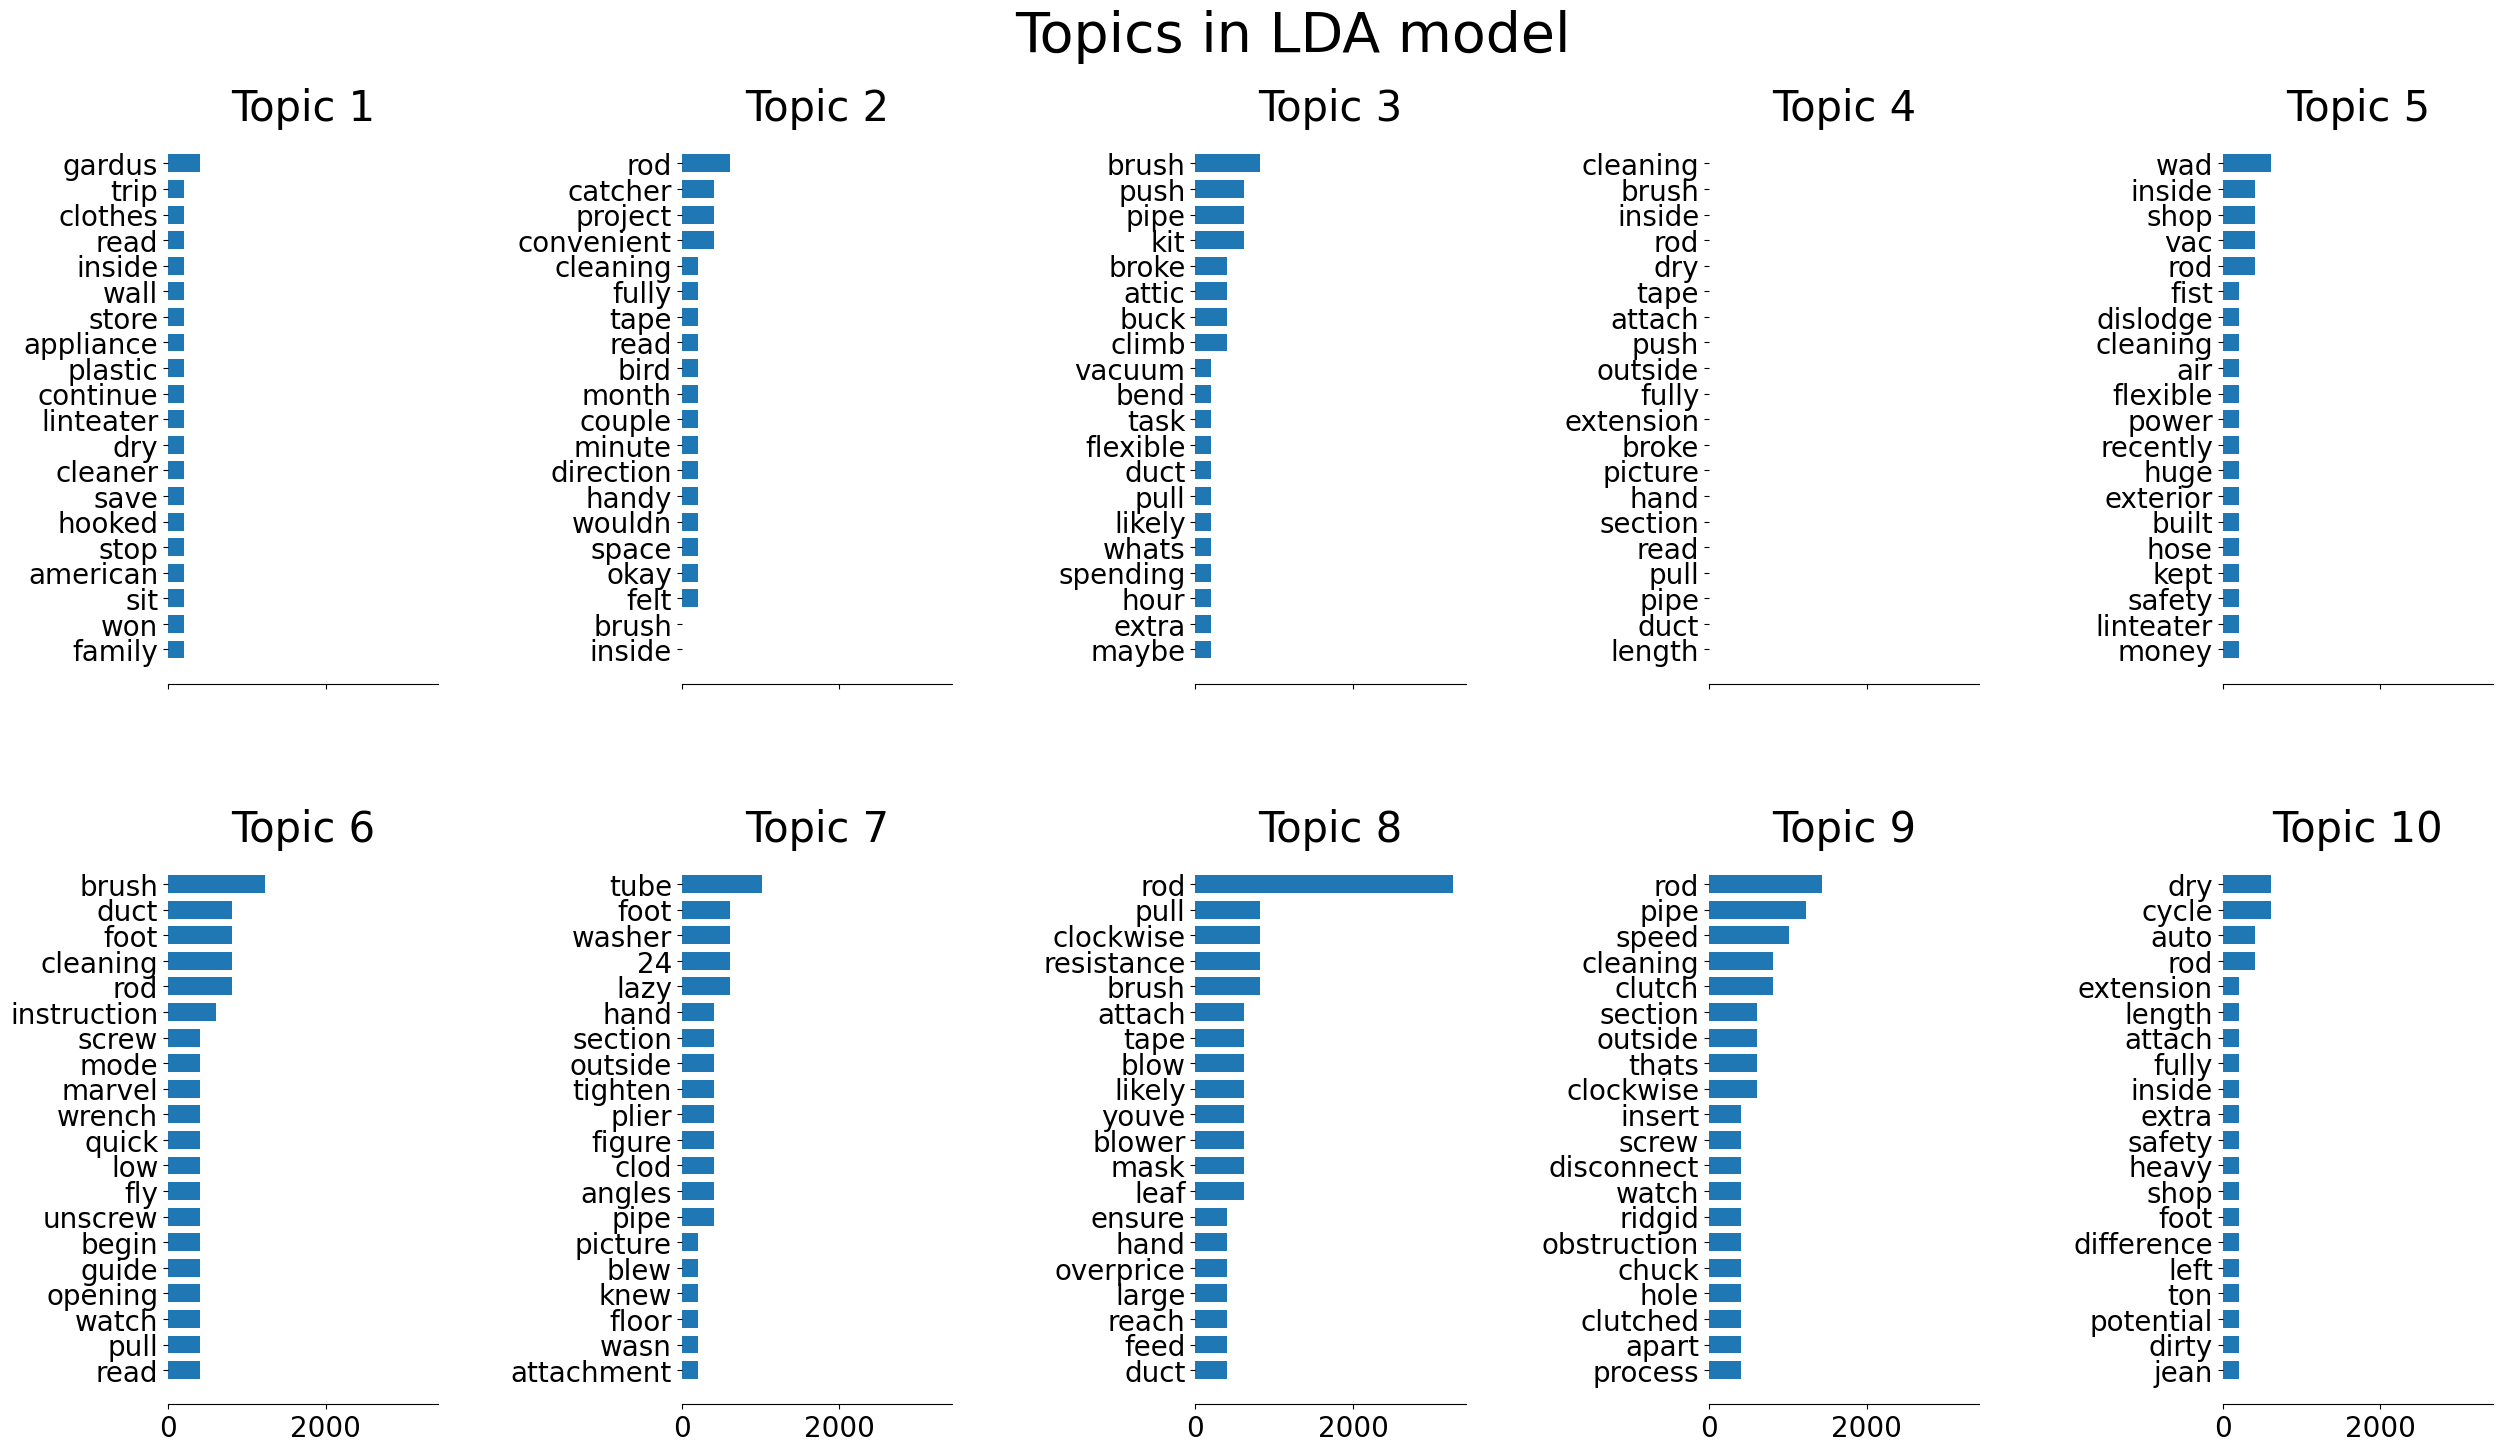

In [139]:
from utils import plot_top_words
from train import get_lda
lda = get_lda(samples=product_documents)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

# Exploration

In [11]:
df['asin'].value_counts()[:20]

B0006GVNOA    2040
B00CZF8B68     574
B009MA34NY     377
B0092UF54A     376
B010RRWKT4     376
B005AGO4LU     376
B014IBJKNO     375
B0014F7B98     374
B0058YEJ5K     367
B001IKJOLW     365
B00BWGHIHY     316
B00136J7ZE     294
B00EH49FRE     283
B00136NUG6     262
B0170K9UTO     259
B002HP8EKE     253
B00122X5VG     244
B0092MKTWQ     233
B0011Z764Q     222
B00JLJ185C     219
Name: asin, dtype: int64

In [138]:
tf_vectorizer.stop_words_

{'inclined',
 'reoord',
 'industrial',
 'b00078v7aw',
 'dec1955',
 'vaca',
 'coloratura',
 'chucker',
 'uhhb',
 'brokas',
 'heritage',
 'grillz',
 '66a',
 'graffitied',
 '163',
 'romatic',
 'dyson',
 '10083',
 'basic',
 'andor',
 'zapp',
 'ud',
 'blender',
 'dementors',
 'hearth',
 'interact',
 'donvan',
 'electronics',
 'groov',
 'tok',
 'polonica',
 'yt',
 'muscial',
 'instinctive',
 'trompo',
 'b005tzfzjc',
 'cartoon',
 'krakowiak',
 'nope',
 'raff',
 'bruce',
 'yarbrough',
 'argues',
 'unwrap',
 'learned',
 'kubrick',
 'kleine',
 'homeboy',
 'essence',
 'whorish',
 'firmly',
 'perritos',
 'start',
 'liness',
 'mickie',
 'hto',
 'reakin',
 'aire',
 'sooner',
 'benchmark',
 'encanto',
 'executed',
 'buckbeak',
 'areal',
 'ketchum',
 'scriabin',
 'b0088ib000',
 'fateful',
 'wanted',
 '3dn',
 'poignant',
 'untill',
 'crusade',
 'autotuning',
 'tho',
 'nius',
 'ambiguity',
 'cunningly',
 'dooby',
 'charol',
 'liteners',
 'coachella',
 'b000001vfk',
 'deposited',
 'gutted',
 'formed',
 '

In [135]:
from preprocessing import preprocess_sample

raw_reviews = list(filter(lambda x: isinstance(x, str), df[df['asin'] == product_id]['reviewText']))
processed_sentences, raw_sentences = preprocess_sample(raw_reviews[337], get_raw=True)

processed_sentences

9it [00:00, 142987.64it/s]
9it [00:00, 40942.23it/s]
9it [00:00, 347.32it/s]


['first thing first it work',
 'the kit be great in what it consists of and the price be just right i think',
 'to call someone to clean my dryer vent i get quote from 80 all the way up to 200 buck',
 'so if you be able to do it yourself you will need to invest a bit more in a "construction" vacuum that cost about 80-100 buck and start the saving basically from the second time you do it',
 'so whats with the 3*',
 'my brush broke inside my vent',
 'while i be pull it out and yes i be use a drill all the piece come out except the round brush',
 'i have to climb to my attic and push it from the other side to come out what be suppose to be an easy task end up with me spending over an hour extra in climb in my attic disassemble the hvac pipe so that i can get in there and push down on the brush another minus for this kit be that while it be fairly bendy it will not go very smoothly through your flexible insulate pipe and most likely push the pipe out from it connector',
 'with all that say

In [123]:
for i, sample in enumerate(raw_reviews):
    if len(sample) > 300 and len(sample) < 700:
        print(i,":", sample)

In [127]:
feature_names = tf_vectorizer.get_feature_names_out()
topic_words = []
for topic in lda.components_:
    top_features_ind = topic.argsort()[: -10- 1 : -1]
    topic_words.append([feature_names[i] for i in top_features_ind])

In [133]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# TODO: for now compound (a composite score) will suffice. Neutrality (neu) might suggest highly informational content.
for raw, processed in zip(raw_sentences, processed_sentences):
    vs = analyzer.polarity_scores(raw)
    probs = lda.transform(tf_vectorizer.transform([processed]))[0]
    topic = probs.argmax()
    if probs[topic] < 0.2:
        print("{} \n\t overall: {:.2f} neutral: {:.2f}, No Topic\n".format(raw, vs['compound'], vs['neu']))
    else:
        print("{} \n\t overall: {:.2f} neutral: {:.2f}, Topic {}: {}\n".format(raw, vs['compound'], vs['neu'], topic+1, ", ".join(topic_words[topic])))

first thing first: it works. 
	 overall: 0.00 neutral: 1.00, No Topic

the kit is great in what it consists of and the price is just right i think. 
	 overall: 0.62 neutral: 0.80, Topic 3: brush, push, pipe, kit, broke, attic, buck, climb, vacuum, bend

to call someone to clean my dryer vents i got quoted from 80 all the way up to 200 bucks. 
	 overall: 0.40 neutral: 0.88, Topic 3: brush, push, pipe, kit, broke, attic, buck, climb, vacuum, bend

so if you were able to do it yourself you will need to invest a bit more in a "construction" vacuum that cost about 80-100 bucks and start the savings basically from the second time you do it. 
	 overall: 0.00 neutral: 1.00, Topic 3: brush, push, pipe, kit, broke, attic, buck, climb, vacuum, bend

so whats with the 3*? 
	 overall: 0.00 neutral: 1.00, Topic 3: brush, push, pipe, kit, broke, attic, buck, climb, vacuum, bend

my brush broke inside my vent!!!! 
	 overall: -0.61 neutral: 0.56, Topic 3: brush, push, pipe, kit, broke, attic, buck, cli

In [21]:
def predict(text):
    raw_sentences = sent_tokenize(text)

    processed_sentences = raw_sentences[:]
    processed_sentences = lowercasing(processed_sentences)
    processed_sentences = punctuation_removal(processed_sentences)
    processed_sentences = lemmatize(processed_sentences)
    

    res = []
    present_topics = set()
    for raw, processed in zip(raw_sentences, processed_sentences):
        vs = analyzer.polarity_scores(raw)
        print("{} \n\t overall: {:.2f} neutral: {:.2f}\n".format(raw, vs['compound'], vs['neu']))


        probs = lda.transform(tf_vectorizer.transform([processed]))[0]
        topic = probs.argmax()
        
        res.append((raw, f"Topic {topic+1} ({round(vs['compound'],2)})"))
        present_topics.add(topic)
        
    topics = {str(i+1): ", ".join(topic_words[i]) for i in sorted(list(present_topics))}
    print(topics)
    return [res, topics]

In [22]:
import numpy as np

sentiment_vals = np.linspace(-1.0, 1.0, num=201)
color_map = {}

colors = {1: "red", 2: "orange", 3: "lime", 4: "pink", 5: "brown", 6: "green", 7: "purple", 8: "blue", 9: "cyan", 10: "yellow"}

for i, color in colors.items():
    color_map.update({f"Topic {i} ({round(val,2)})": color for val in sentiment_vals})

In [23]:
import gradio as gr
from gradio.components import Textbox, HighlightedText, JSON

gr.Interface(fn=predict, 
             inputs=Textbox(placeholder="Enter review here...", lines=5), 
             outputs=[HighlightedText().style(color_map=color_map), JSON()],
             examples=[
        ["Good indoor training shoes for running on treadmill, doing lunges and regular exercises at the gym. These are very flexible, light weight and comfortable. Grip is okay - sticky rubber is used only at the edges of heel and toe areas so I slipped a little when I worked on cable machines, resistance band, etc. on un-carpeted floor.  I would emphasize that if you do lifting as a part of your everyday routine workout I would not recommend them because mine (cushion) lasted only for six months and this is the reason I gave three stars. Other than that, I liked them!"],
        ["I've had these shoes for about a week now and have so far enjoyed using them. Considering the fact that I have wide feet, the shoes are slightly tight. However, it doesn't feel uncomfortable nor does it bothers me as I use them throughout my workouts. I know some people personally like when the shoes are a bit tighter or a bit looser so it's all in personal preference."],
        ["The picture makes the shoe look like it has a \"boxier\" toe rather than the \"pointier\" toe that it actually has. I have wider feet and generally need to buy a size or half size longer to get a comfortable width (in any brand of shoe). I was shooting for a rounder, broader toe design which is more comfortable for me, and I feel that the pictures of this shoe didn't accurately depict what I received, in that one detail. Otherwise, \"the shoe fits\" So I am wearing it."]
    ],
) \
    .launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a257b938640c28e3.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x2ad5a0d60>,
 'http://127.0.0.1:7860/',
 'https://a257b938640c28e3.gradio.app')